In [1]:
# import sys
# from  ift6758.data.data_acquisition import Season
# season2018 = Season(2018,"../ift6758/data")
# df_season2018_clean = season2018.clean_data()
# df[["gamePk","liveData.plays.allPlays"]]

In [51]:
from ipywidgets import widgets, interact, RadioButtons, IntSlider, Output, Layout, Dropdown
from ipywidgets.embed import embed_minimal_html

import json
import pandas
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import requests
import json

In [2]:
IMG_PATH = "../figures/nhl_rink.png"

In [3]:
url = 'https://statsapi.web.nhl.com/api/v1/teams'

r = requests.get(url, headers={'accept': 'application/json'})
json_teams = r.json()

print(json_teams["teams"])

[{'id': 1, 'name': 'New Jersey Devils', 'link': '/api/v1/teams/1', 'venue': {'name': 'Prudential Center', 'link': '/api/v1/venues/null', 'city': 'Newark', 'timeZone': {'id': 'America/New_York', 'offset': -4, 'tz': 'EDT'}}, 'abbreviation': 'NJD', 'teamName': 'Devils', 'locationName': 'New Jersey', 'firstYearOfPlay': '1982', 'division': {'id': 18, 'name': 'Metropolitan', 'nameShort': 'Metro', 'link': '/api/v1/divisions/18', 'abbreviation': 'M'}, 'conference': {'id': 6, 'name': 'Eastern', 'link': '/api/v1/conferences/6'}, 'franchise': {'franchiseId': 23, 'teamName': 'Devils', 'link': '/api/v1/franchises/23'}, 'shortName': 'New Jersey', 'officialSiteUrl': 'http://www.newjerseydevils.com/', 'franchiseId': 23, 'active': True}, {'id': 2, 'name': 'New York Islanders', 'link': '/api/v1/teams/2', 'venue': {'name': 'UBS Arena', 'link': '/api/v1/venues/null', 'city': 'Elmont', 'timeZone': {'id': 'America/New_York', 'offset': -4, 'tz': 'EDT'}}, 'abbreviation': 'NYI', 'teamName': 'Islanders', 'locat

In [4]:
team_list = list()
for team in json_teams["teams"]:
    team_list.append(team["name"])
print(team_list)

['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights', 'Seattle Kraken']


In [46]:
#CHOOSE GAME ID
season_selector = IntSlider(
    value=2016,
    min=2016,
    max=2020,
    step=1,
    description='Season: ',
    continuous_update=False, #only reassign value when the slider stops moving
    layout=Layout(width='50%')
)

#CHOOSE GAME TYPE
team_selector = Dropdown(
    options=team_list,
    value='New Jersey Devils',
    description='Number:',
    disabled=False,
    continuous_update=False,
    layout=Layout(width='50%')
)

In [55]:
def fig_shot_map(team, season):
    
    #create figure
    img = plt.imread(IMG_PATH)
    fig, ax = plt.subplots(figsize=(20,10))
    
    #prep the ring and the axis of the ring
    plt.xlim(-100, 100)
    plt.ylim(-42.5, 42.5)
    plt.xlabel("feet")
    plt.ylabel("feet")
    plt.title(team + '\n' + 
              "Season: " + str(season) + "  Relative to League Average for the Season ")
    ax.imshow(img, extent=[-100, 100, -42.5, 42.5], aspect='auto')
    
    #get random data
    from random import randint
    #Z = np.random.rand(85,90)
    Z = np.random.uniform(-1,1,(85,90))

    
    #create cmap
    norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
    cmap = cm.PRGn
    
    #draw the contour maps
    levels = np.arange(-1, 1, 0.2)
    
    CS1 = ax.contourf(Z, levels, norm=norm,
                   cmap=cm.get_cmap(cmap, len(levels) - 1),
                   extent=[0, 100, -42.5, 42.5],
                    linewidths=2
                  )
    
# It is not necessary, but for the colormap, we need only the
# number of levels minus 1.  To avoid discretization error, use
# either this number or a large number such as the default (256).

# If we want lines as well as filled regions, we need to call
# contour separately; don't try to change the edgecolor or edgewidth
# of the polygons in the collections returned by contourf.
# Use levels output from previous call to guarantee they are the same.

    #CS2 = ax.contour(Z, CS1.levels, colors='k', extent=[0, 100, -42.5, 42.5])
    
    # make the color bar for the contour lines
    CB = fig.colorbar(CS1, shrink=0.8)
    #change its location
#     l, b, w, h = ax.get_position().bounds
#     ll, bb, ww, hh = CB.ax.get_position().bounds
#     CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])
    #fig.tight_layout()
    #show it
    plt.show()

IntSlider(value=2016, continuous_update=False, description='Season: ', layout=Layout(width='50%'), max=2020, m…

Dropdown(description='Number:', index=16, layout=Layout(width='50%'), options=('New Jersey Devils', 'New York …

Output()

C:\Users\alaed\AppData\Local\Temp/ipykernel_7296/3680323504.py:29: UserWarning: linewidths is ignored by contourf
  CS1 = ax.contourf(Z, levels, norm=norm,


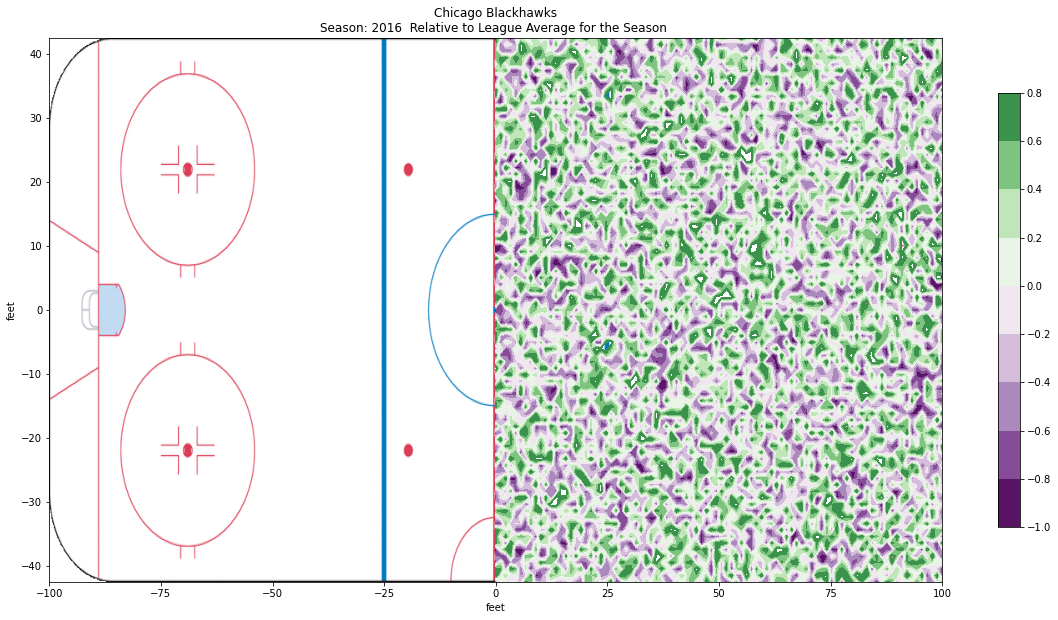

Output()

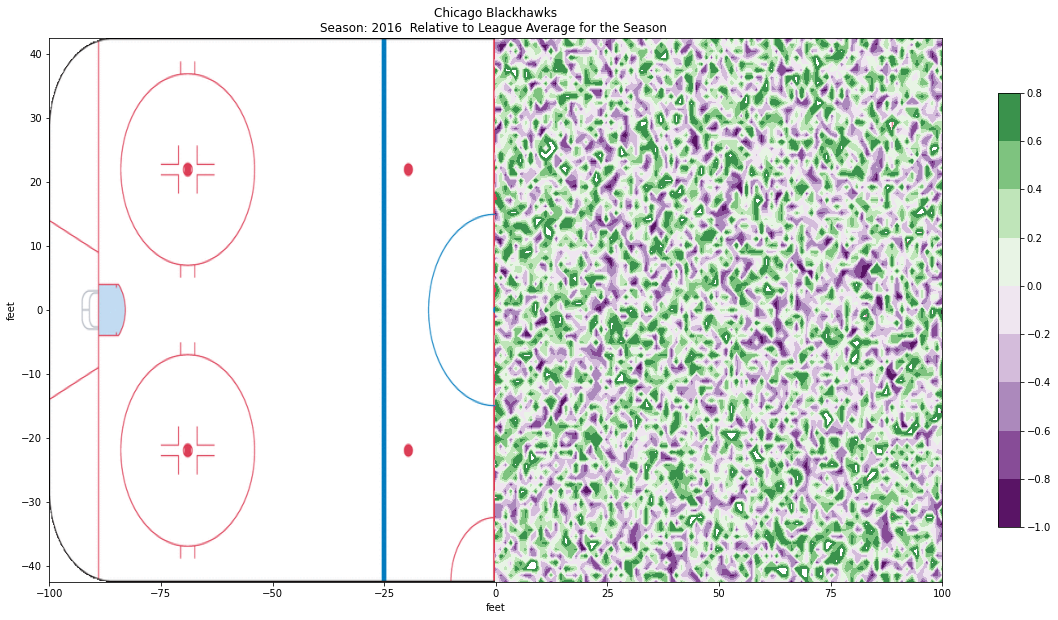

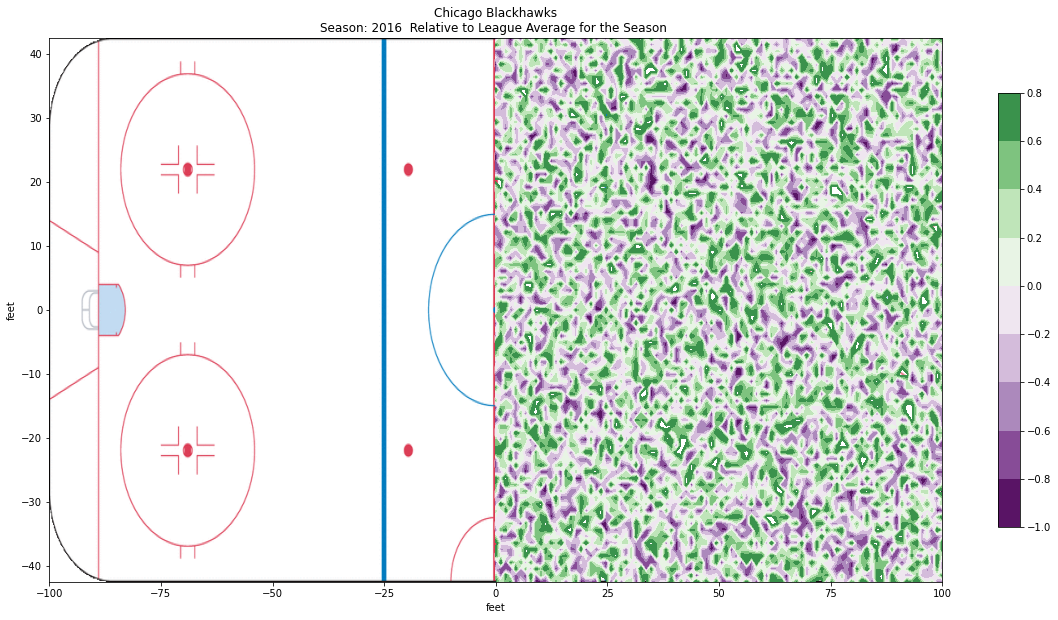

C:\Users\alaed\AppData\Local\Temp/ipykernel_7296/3680323504.py:29: UserWarning: linewidths is ignored by contourf
  CS1 = ax.contourf(Z, levels, norm=norm,


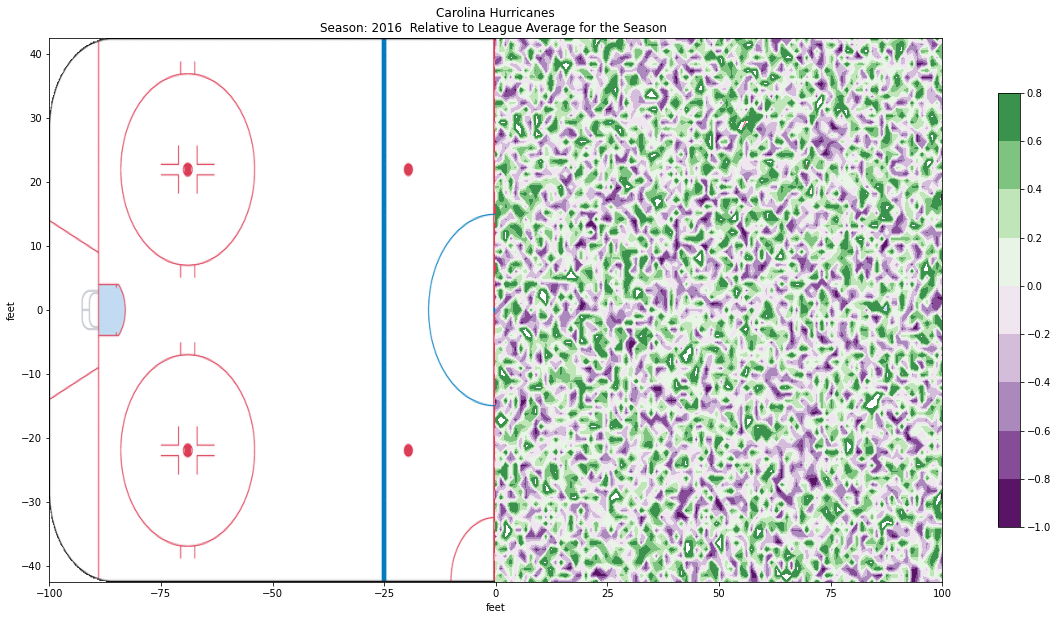

Output()

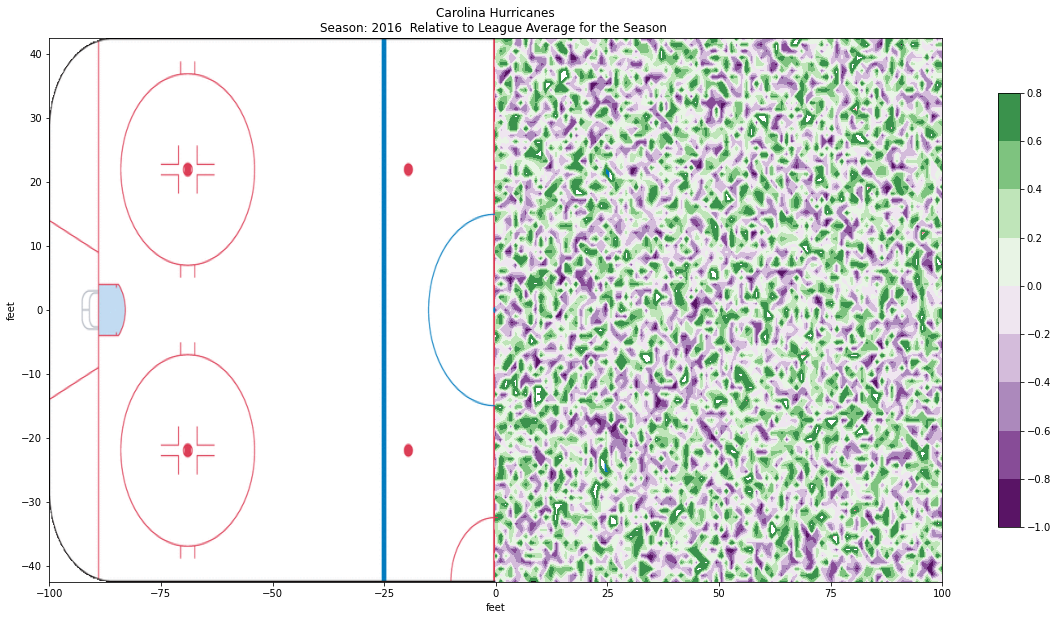

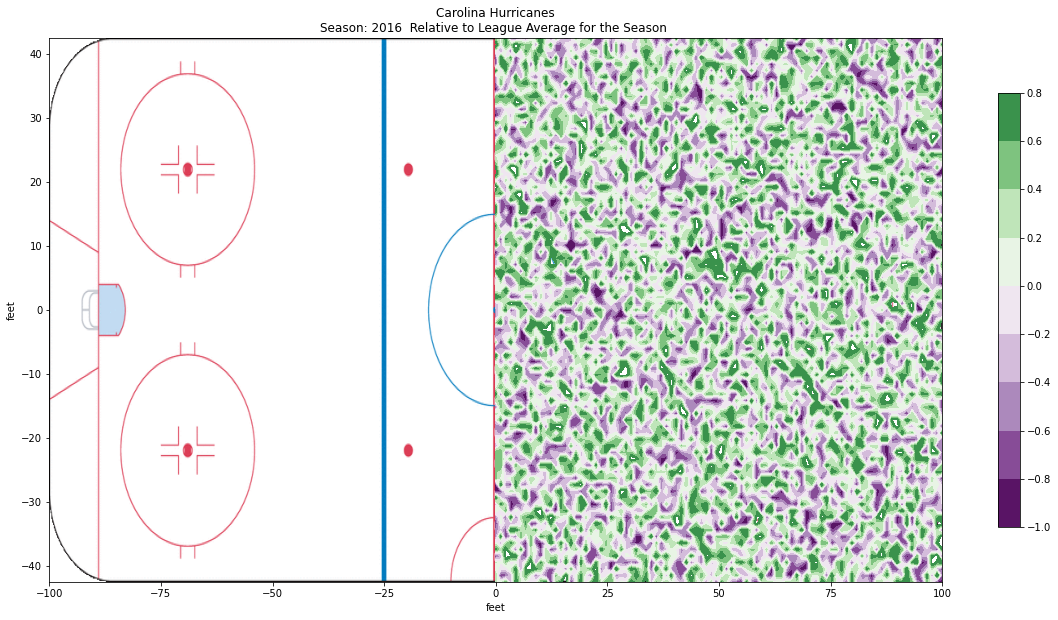

In [56]:
display(season_selector, team_selector)

#init season as 2016
season = "2016"

#LINK season to widget 
def update_season(change):
    global season
    season = change['new']
    
season_selector.observe(update_season, 'value')


output = Output()
display(output)

#init team
team = "New Jersey Devils"

#LINK team to widget 
def update_team(change):
    
    output.clear_output()
    
    #update team
    global team
    global season
    team = change['new']
    
    fig_shot_map(team, season)
    
team_selector.observe(update_team, 'value')


In [53]:
embed_minimal_html('export.html', views=[season_selector, team_selector, output], title='Widgets export')